In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
data = pd.read_csv("../PMD_Analysis/data/pmd_full_4.txt",sep = "\t", header=None)

In [3]:
data.columns = ['encrypted_customer_id','is_promo','is_pmd','revenue','units','min_date','max_date']


data['min_date'] = pd.to_datetime(data['min_date'])
data['max_date'] = pd.to_datetime(data['max_date'])

In [4]:
data.shape

(4873194, 7)

In [5]:
print(data.shape)
print(data['encrypted_customer_id'].nunique())
data.head()

(4873194, 7)
2113141


,encrypted_customer_id,is_promo,is_pmd,revenue,units,min_date,max_date
0,A29NFF34BNM6WI,non_promo,non_pmd,49.01,11,2016-12-23,2019-05-20
1,A2XOOG7N9LBM2D,non_promo,non_pmd,289.94,72,2015-08-18,2019-07-06
2,A37HBT237VVUN7,non_promo,non_pmd,3358.30,343,2014-12-06,2019-05-30
3,APLRQYYT84YUL,promo,non_pmd,8.31,2,2018-11-26,2019-02-24
4,A1R8G0LEHUYM9,non_promo,non_pmd,1926.09,474,2015-03-14,2019-07-06


# Part One - how many customers have only pmd

In [6]:
table = pd.pivot_table(data, values='units', index=['encrypted_customer_id'],
                       columns=['is_pmd'], aggfunc=np.sum, fill_value=0).reset_index()

In [7]:
table.head()

is_pmd,encrypted_customer_id,is_pmd,non_pmd
0,A0000366A0GK5998YBDT,1,71
1,A0000666DG4NFCAMI8,5,30
2,A0001210LXBR1BZ5BP3,13,19
3,A00014502OC4OBEX6TX4A,1,1
4,A0002142161IPUDSA8D6H,4,27


In [8]:
table[table['non_pmd'] == 0].shape[0] / table['encrypted_customer_id'].nunique()

0.037025451685429416

In [9]:
table[table['non_pmd'] == 0].tail()

is_pmd,encrypted_customer_id,is_pmd,non_pmd
2113077,AZZV50VYBWJ11,5,0
2113104,AZZX1XYC5954A,1,0
2113124,AZZYC5ZA1SQUR,3,0
2113127,AZZYO1YQ1HWI5,1,0
2113136,AZZZRNKD8SDUD,2,0


In [10]:
data[data['encrypted_customer_id'] == 'A0000666DG4NFCAMI8']

,encrypted_customer_id,is_promo,is_pmd,revenue,units,min_date,max_date
86995,A0000666DG4NFCAMI8,non_promo,non_pmd,110.65,27,2016-01-24,2019-06-01
2634146,A0000666DG4NFCAMI8,promo,is_pmd,15.91,5,2017-05-26,2018-11-23
3714286,A0000666DG4NFCAMI8,promo,non_pmd,12.57,3,2018-12-18,2018-12-23


# Part Two - sampled 

In [11]:
df = pd.read_csv("../PMD_Analysis/data/sampled_4.txt", sep = "\t", header=None)

In [12]:
df.columns = ['encrypted_customer_id','is_promo','is_pmd','fufill_date_local',
              'revenue','units','min_date','max_date']

df.head()

,encrypted_customer_id,is_promo,is_pmd,fufill_date_local,revenue,units,min_date,max_date
0,A27RK0PZTWCCOU,promo,is_pmd,2019-04-30 00:00:00,3.32,1,2019-04-30 00:00:00,2019-04-30 00:00:00
1,AX1QMYZ9ZMFPR,non_promo,non_pmd,2019-03-09 00:00:00,3.35,1,2019-03-09 00:00:00,2019-03-09 00:00:00
2,A16JZ6X4GEGEK5,promo,is_pmd,2018-06-10 00:00:00,4.19,1,2018-06-10 00:00:00,2018-06-10 00:00:00
3,A3KD1FVDAXM3H1,promo,is_pmd,2018-07-11 00:00:00,5.03,1,2018-07-11 00:00:00,2018-07-11 00:00:00
4,A3HGBF6P6CNA1U,non_promo,non_pmd,2017-07-24 00:00:00,10.08,1,2017-07-24 00:00:00,2017-07-24 00:00:00


In [13]:
#Create function to create first PMD event per customer

def first_pmd_event(df):
    
    df['fufill_date_local'] = pd.to_datetime(df['fufill_date_local'])
    df['min_date'] = pd.to_datetime(df['min_date'])
    df['max_date'] = pd.to_datetime(df['max_date'])
    
    first_pmd = df[df['is_pmd'] == 'is_pmd'].groupby("encrypted_customer_id")['fufill_date_local'].min().reset_index()
    
    
    df_new = pd.merge(left = df, right = first_pmd, left_on = ['encrypted_customer_id'],
                     right_on = ['encrypted_customer_id'], how = 'left')
    
    df_new.columns = ['encrypted_customer_id','is_promo','is_pmd','fufill_date_local',
              'revenue','units','min_date','max_date','first_pmd_date']
    
    first_ever = df.groupby('encrypted_customer_id')['fufill_date_local'].min().reset_index()
    first_ever.columns = ['encrypted_customer_id','first_ever_purchase_date']
    
    df_new = pd.merge(left = df_new, right = first_ever, left_on = ['encrypted_customer_id'],
                     right_on = ['encrypted_customer_id'], how = 'left')
    
    
    return df_new

In [14]:
df_new = first_pmd_event(df)

In [15]:
df_new.head()

,encrypted_customer_id,is_promo,is_pmd,fufill_date_local,revenue,units,min_date,max_date,first_pmd_date,first_ever_purchase_date
0,A27RK0PZTWCCOU,promo,is_pmd,2019-04-30,3.32,1,2019-04-30,2019-04-30,2019-04-26,2019-04-13
1,AX1QMYZ9ZMFPR,non_promo,non_pmd,2019-03-09,3.35,1,2019-03-09,2019-03-09,2016-11-04,2014-04-30
2,A16JZ6X4GEGEK5,promo,is_pmd,2018-06-10,4.19,1,2018-06-10,2018-06-10,2015-09-25,2015-07-29
3,A3KD1FVDAXM3H1,promo,is_pmd,2018-07-11,5.03,1,2018-07-11,2018-07-11,2018-07-11,2018-03-02
4,A3HGBF6P6CNA1U,non_promo,non_pmd,2017-07-24,10.08,1,2017-07-24,2017-07-24,2017-04-03,2016-04-29


In [16]:
df_new[(df_new['encrypted_customer_id']== 'AX1QMYZ9ZMFPR') & (df_new['is_pmd'] == 'is_pmd')]

,encrypted_customer_id,is_promo,is_pmd,fufill_date_local,revenue,units,min_date,max_date,first_pmd_date,first_ever_purchase_date
477867,AX1QMYZ9ZMFPR,promo,is_pmd,2018-07-17,1.67,1,2018-07-17,2018-07-17,2016-11-04,2014-04-30
537184,AX1QMYZ9ZMFPR,promo,is_pmd,2019-05-05,0.83,1,2019-05-05,2019-05-05,2016-11-04,2014-04-30
843946,AX1QMYZ9ZMFPR,promo,is_pmd,2016-11-04,0.83,1,2016-11-04,2016-11-04,2016-11-04,2014-04-30


In [17]:
table_pivot = pd.pivot_table(df_new, values='units', index=['encrypted_customer_id'],
                       columns=['is_pmd'], aggfunc=np.sum, fill_value=0).reset_index()

In [18]:
table_pivot[table_pivot['non_pmd'] == 0].shape[0] /  df_new['encrypted_customer_id'].nunique()

0.0371

# Part Three - customers who purchased both

In [19]:
df_new[(df_new['encrypted_customer_id'].isin(['A00227261SMGG33C7MOOY']))].sort_values(by = 'fufill_date_local', ascending = True).head()

,encrypted_customer_id,is_promo,is_pmd,fufill_date_local,revenue,units,min_date,max_date,first_pmd_date,first_ever_purchase_date
2823884,A00227261SMGG33C7MOOY,non_promo,non_pmd,2014-09-24,8.40,1,2014-09-24,2014-09-24,2018-01-08,2014-09-24
641105,A00227261SMGG33C7MOOY,non_promo,non_pmd,2014-10-04,3.35,1,2014-10-04,2014-10-04,2018-01-08,2014-09-24
3011282,A00227261SMGG33C7MOOY,non_promo,non_pmd,2014-10-05,10.08,1,2014-10-05,2014-10-05,2018-01-08,2014-09-24
1498605,A00227261SMGG33C7MOOY,non_promo,non_pmd,2014-11-09,5.87,1,2014-11-09,2014-11-09,2018-01-08,2014-09-24
1099323,A00227261SMGG33C7MOOY,non_promo,non_pmd,2014-11-16,8.40,1,2014-11-16,2014-11-16,2018-01-08,2014-09-24


## Distribute frequency and units before and after first PMD

In [20]:
def split_before_after_first_PMD(df):
    
    metrics_before_first_PMD_by_Promo = df[df['fufill_date_local'] < df['first_pmd_date']].groupby(["encrypted_customer_id",'is_promo','is_pmd'])['units','revenue'].sum().reset_index()
    first_ever_purchase_by_Promo =      df[df['fufill_date_local'] < df['first_pmd_date']].groupby(["encrypted_customer_id",'is_promo','is_pmd'])['fufill_date_local'].min().reset_index()
    first_ever_purchase =               df[df['fufill_date_local'] < df['first_pmd_date']].groupby(["encrypted_customer_id"])['fufill_date_local'].min().reset_index()
    last_before_purchase =     df[df['fufill_date_local'] < df['first_pmd_date']].groupby(["encrypted_customer_id"])['fufill_date_local'].max().reset_index()
    last_beforePMD_purchase_by_Promo = df[df['fufill_date_local'] < df['first_pmd_date']].groupby(["encrypted_customer_id",'is_promo','is_pmd'])['fufill_date_local'].max().reset_index()

    df1 = pd.merge(left=metrics_before_first_PMD_by_Promo, right=first_ever_purchase_by_Promo,
                   left_on=["encrypted_customer_id",'is_promo','is_pmd'],
                   right_on = ["encrypted_customer_id",'is_promo','is_pmd'], how= 'left')
    df2 = pd.merge(left=df1, right=last_beforePMD_purchase_by_Promo,
                   left_on=["encrypted_customer_id",'is_promo','is_pmd'],
                   right_on = ["encrypted_customer_id",'is_promo','is_pmd'], how= 'left')
    df3 = pd.merge(left=df2, right=first_ever_purchase,
                   left_on=["encrypted_customer_id"],
                   right_on = ["encrypted_customer_id"], how= 'left')
    df4 = pd.merge(left=df3, right=last_before_purchase,
                   left_on=["encrypted_customer_id"],
                   right_on = ["encrypted_customer_id"], how= 'left')
    
    df4.columns = ['encrypted_customer_id','is_promo','is_pmd','units','revenue',
                   'first_date_byPromo','last_date_byPromo','first_everdate','last_ever_date']
    
    df4['frequency_days_byPromo'] = (( df4['last_date_byPromo'] - df4['first_date_byPromo'] )
                                / np.timedelta64(1,"D") ) / (df4['units'] - 1)
    
   
    
    metrics_before_first_PMD = df[df['fufill_date_local'] <
                                      df['first_pmd_date']].groupby(["encrypted_customer_id"])['units','revenue'].sum().reset_index()
    
    
    df5 = pd.merge(left=df4, right=metrics_before_first_PMD,
                   left_on=["encrypted_customer_id"],
                   right_on = ["encrypted_customer_id"], how= 'left')
    df5.columns = ['encrypted_customer_id','is_promo','is_pmd','units_byPromo','revenue_byPromo',
                   'first_date_byPromo','last_date_byPromo','first_ever_date','last_ever_date',
                   'frequency_days_byPromo','units_ever','revenue_ever']
    
    df5['frequency_days_general'] = (( df5['last_ever_date'] - df5['first_ever_date'] )
                                / np.timedelta64(1,"D") ) / (df5['units_ever'] - 1)
    df5 = df5.fillna(0)
    
   
                 
    df5['label'] = np.select(
        [
                    df5['units_ever'] <  metrics_before_first_PMD['units'].quantile(0.25),
        
                    (df5['units_ever'] >= metrics_before_first_PMD['units'].quantile(0.25)  ) & 
                    (df5['units_ever'] <  metrics_before_first_PMD['units'].quantile(0.50)  ),
        
                    (df5['units_ever'] >=  metrics_before_first_PMD['units'].quantile(0.5)  ) &
                    (df5['units_ever'] <  metrics_before_first_PMD['units'].quantile(0.75) ),
                    
                    df5['units_ever'] >=  metrics_before_first_PMD['units'].quantile(0.75) 
        ],
        [
            'A_Below_25',
            'B_Between_25_50',
            'C_Between_50_75',
            'D_Above_75'
        ],
        default = 'E_Unknown'

    )
    
    df5['ARPU_total'] = df5['revenue_ever'] / df5['units_ever'] 
    df5['share_as_total'] = df5['units_byPromo'] / df5['units_ever']
    
    df5['timeframe_general'] = (( df5['last_ever_date'] - df5['first_ever_date'] ) / np.timedelta64(1,"M") ) 
    df5['timeframe_general_by_Promo'] = (( df5['last_date_byPromo'] - df5['first_date_byPromo'] ) / np.timedelta64(1,"M") ) 
    
    
    return df5
    

In [21]:
before = split_before_after_first_PMD(df_new)

In [22]:
before[before['encrypted_customer_id'].isin(['A00227261SMGG33C7MOOY','AX1QMYZ9ZMFPR'])]

,encrypted_customer_id,is_promo,is_pmd,units_byPromo,revenue_byPromo,first_date_byPromo,last_date_byPromo,first_ever_date,last_ever_date,frequency_days_byPromo,units_ever,revenue_ever,frequency_days_general,label,ARPU_total,share_as_total,timeframe_general,timeframe_general_by_Promo
0,A00227261SMGG33C7MOOY,non_promo,non_pmd,29,209.42,2014-09-24,2017-12-20,2014-09-24,2017-12-20,42.250000,30,214.45,40.793103,D_Above_75,7.148333,0.966667,38.867328,38.867328
1,A00227261SMGG33C7MOOY,promo,non_pmd,1,5.03,2017-11-02,2017-11-02,2014-09-24,2017-12-20,0.000000,30,214.45,40.793103,D_Above_75,7.148333,0.033333,38.867328,0.000000
89332,AX1QMYZ9ZMFPR,non_promo,non_pmd,50,272.59,2014-04-30,2016-10-28,2014-04-30,2016-10-28,18.612245,50,272.59,18.612245,D_Above_75,5.451800,1.000000,29.963654,29.963654


In [23]:
def split_after_first_PMD(df):
    
    made_before = split_before_after_first_PMD(df)
    
    #Subset those who had non pmd as first ever transaction
    subset = df[df['encrypted_customer_id'].isin(made_before['encrypted_customer_id'])]
    
    
    metrics_after_first_PMD_by_Promo = subset[subset['fufill_date_local'] >= subset['first_pmd_date']].groupby(["encrypted_customer_id",'is_promo','is_pmd'])['units','revenue'].sum().reset_index()
    first_afterPMD_purchase_by_Promo = subset[subset['fufill_date_local'] >= subset['first_pmd_date']].groupby(["encrypted_customer_id",'is_promo','is_pmd'])['fufill_date_local'].min().reset_index()
    first_afterPMD_ever_purchase =     subset[subset['fufill_date_local'] >= subset['first_pmd_date']].groupby(["encrypted_customer_id"])['fufill_date_local'].min().reset_index()
    
    last_afterPMD_purchase = subset[subset['fufill_date_local'] >= subset['first_pmd_date']].groupby(["encrypted_customer_id"])['fufill_date_local'].max().reset_index()
    last_afterPMD_purchase_by_Promo = subset[subset['fufill_date_local'] >= subset['first_pmd_date']].groupby(["encrypted_customer_id",'is_promo','is_pmd'])['fufill_date_local'].max().reset_index()
    
    df1 = pd.merge(left=metrics_after_first_PMD_by_Promo, right=first_afterPMD_purchase_by_Promo,
                   left_on=["encrypted_customer_id",'is_promo','is_pmd'],
                   right_on = ["encrypted_customer_id",'is_promo','is_pmd'], how= 'left')
    
    df2 = pd.merge(left=df1, right=last_afterPMD_purchase_by_Promo,
                   left_on=["encrypted_customer_id",'is_promo','is_pmd'],
                   right_on = ["encrypted_customer_id",'is_promo','is_pmd'], how= 'left')
    
    df3 = pd.merge(left=df2, right=first_afterPMD_ever_purchase,
                   left_on=["encrypted_customer_id"],
                   right_on = ["encrypted_customer_id"], how= 'left')
    df4 = pd.merge(left=df3, right=last_afterPMD_purchase,
                   left_on=["encrypted_customer_id"],
                   right_on = ["encrypted_customer_id"], how= 'left')
    
    df4.columns = ['encrypted_customer_id','is_promo','is_pmd','units','revenue',
                   'first_date_byPromo','last_date_byPromo','first_afterPMD_everdate','last_afterPMD_ever_date']
    
    df4['frequency_days_byPromo'] = (( df4['last_date_byPromo'] - df4['first_date_byPromo'] )
                                / np.timedelta64(1,"D") ) / (df4['units'] - 1)
    
    metrics_after_first_PMD = subset[subset['fufill_date_local'] >=
                                      subset['first_pmd_date']].groupby(["encrypted_customer_id"])['units','revenue'].sum().reset_index()
    
    df5 = pd.merge(left=df4, right=metrics_after_first_PMD,
                   left_on=["encrypted_customer_id"],
                   right_on = ["encrypted_customer_id"], how= 'left')
    
    df5.columns = ['encrypted_customer_id','is_promo','is_pmd','units_byPromo','revenue_byPromo',
                   'first_date_byPromo','last_date_byPromo','first_ever_date','last_ever_date',
                   'frequency_days_byPromo','units_ever','revenue_ever']
    
    df5['frequency_days_general'] = (( df5['last_ever_date'] - df5['first_ever_date'] )
                                / np.timedelta64(1,"D") ) / (df5['units_ever'] - 1)
    df5 = df5.fillna(0)
    
    df5['ARPU_total'] = df5['revenue_ever'] / df5['units_ever']
    
    df5['share_as_total'] = df5['units_byPromo'] / df5['units_ever']
    
    df5['timeframe_general'] = (( df5['last_ever_date'] - df5['first_ever_date'] ) / np.timedelta64(1,"M") ) 
    df5['timeframe_general_by_Promo'] = (( df5['last_date_byPromo'] - df5['first_date_byPromo'] ) / np.timedelta64(1,"M") ) 
    
    return df5

In [24]:
after = split_after_first_PMD(df_new)

In [25]:
after[after['encrypted_customer_id'].isin(['A00227261SMGG33C7MOOY','AX1QMYZ9ZMFPR'])]

,encrypted_customer_id,is_promo,is_pmd,units_byPromo,revenue_byPromo,first_date_byPromo,last_date_byPromo,first_ever_date,last_ever_date,frequency_days_byPromo,units_ever,revenue_ever,frequency_days_general,ARPU_total,share_as_total,timeframe_general,timeframe_general_by_Promo
0,A00227261SMGG33C7MOOY,non_promo,non_pmd,29,138.38,2018-02-19,2019-06-21,2018-01-08,2019-06-21,17.392857,49,230.55,11.020833,4.705102,0.591837,17.380234,16.000329
1,A00227261SMGG33C7MOOY,promo,is_pmd,17,73.72,2018-01-08,2019-03-09,2018-01-08,2019-06-21,26.562500,49,230.55,11.020833,4.705102,0.346939,17.380234,13.963326
2,A00227261SMGG33C7MOOY,promo,non_pmd,3,18.45,2018-08-02,2019-05-04,2018-01-08,2019-06-21,137.500000,49,230.55,11.020833,4.705102,0.061224,17.380234,9.035093
182464,AX1QMYZ9ZMFPR,non_promo,non_pmd,74,371.09,2016-11-04,2019-07-05,2016-11-04,2019-07-05,13.328767,78,377.77,12.636364,4.843205,0.948718,31.967802,31.967802
182465,AX1QMYZ9ZMFPR,promo,is_pmd,3,3.33,2016-11-04,2019-05-05,2016-11-04,2019-07-05,456.000000,78,377.77,12.636364,4.843205,0.038462,31.967802,29.963654
182466,AX1QMYZ9ZMFPR,promo,non_pmd,1,3.35,2017-08-03,2017-08-03,2016-11-04,2019-07-05,0.000000,78,377.77,12.636364,4.843205,0.012821,31.967802,0.000000


## Change in frequency of purchasing OVERALL

In [26]:
before.groupby(['encrypted_customer_id'])['frequency_days_general'].mean().reset_index()['frequency_days_general'].mean()

58.593384571222565

In [27]:
before.groupby(['encrypted_customer_id'])['frequency_days_general'].mean().reset_index()['frequency_days_general'].quantile([0.25,0.5,0.75])

0.25     9.444444
0.50    27.666667
0.75    66.000000
Name: frequency_days_general, dtype: float64

In [28]:
after.groupby(['encrypted_customer_id'])['frequency_days_general'].mean().reset_index()['frequency_days_general'].mean()

35.844227713895584

In [29]:
after.groupby(['encrypted_customer_id'])['frequency_days_general'].mean().reset_index()['frequency_days_general'].quantile([0.25,0.5,0.75])

0.25    10.189292
0.50    20.500000
0.75    40.940972
Name: frequency_days_general, dtype: float64

### Visualization

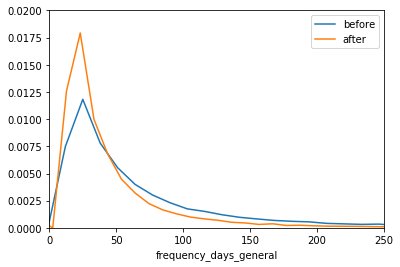

In [30]:
plt.xlim(0, 250)
plt.ylim(0, 0.02)
sns.distplot(before.groupby(['encrypted_customer_id'])['frequency_days_general'].mean().reset_index()['frequency_days_general'],
            hist = False, label = 'before')
sns.distplot(after.groupby(['encrypted_customer_id'])['frequency_days_general'].mean().reset_index()['frequency_days_general'],
            hist = False, label = 'after')
plt.show()

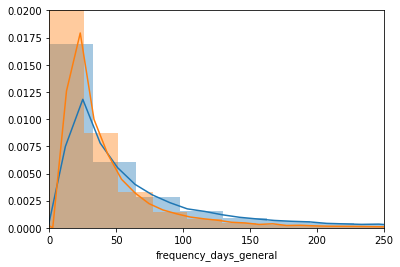

In [31]:
plt.xlim(0, 250)
plt.ylim(0, 0.02)
sns.distplot(before.groupby(['encrypted_customer_id'])['frequency_days_general'].mean().reset_index()['frequency_days_general'],
            hist = True, label = 'before')
sns.distplot(after.groupby(['encrypted_customer_id'])['frequency_days_general'].mean().reset_index()['frequency_days_general'],
            hist = True, label = 'after')
plt.show()

## Change in frequency of purchasing by Bucket Before and After PMD

In [32]:
labels = before[['encrypted_customer_id','label']]
labels = labels.drop_duplicates()

In [33]:
after_labels = pd.merge(left=after, right=labels,
                        left_on=['encrypted_customer_id'], right_on = ['encrypted_customer_id'], how = 'left')

In [34]:
after_labels.head()

,encrypted_customer_id,is_promo,is_pmd,units_byPromo,revenue_byPromo,first_date_byPromo,last_date_byPromo,first_ever_date,last_ever_date,frequency_days_byPromo,units_ever,revenue_ever,frequency_days_general,ARPU_total,share_as_total,timeframe_general,timeframe_general_by_Promo,label
0,A00227261SMGG33C7MOOY,non_promo,non_pmd,29,138.38,2018-02-19,2019-06-21,2018-01-08,2019-06-21,17.392857,49,230.55,11.020833,4.705102,0.591837,17.380234,16.000329,D_Above_75
1,A00227261SMGG33C7MOOY,promo,is_pmd,17,73.72,2018-01-08,2019-03-09,2018-01-08,2019-06-21,26.562500,49,230.55,11.020833,4.705102,0.346939,17.380234,13.963326,D_Above_75
2,A00227261SMGG33C7MOOY,promo,non_pmd,3,18.45,2018-08-02,2019-05-04,2018-01-08,2019-06-21,137.500000,49,230.55,11.020833,4.705102,0.061224,17.380234,9.035093,D_Above_75
3,A003960233B7I9ERAOVU6,non_promo,non_pmd,28,147.59,2018-07-21,2019-06-22,2018-05-13,2019-06-22,12.444444,30,152.61,13.965517,5.087000,0.933333,13.306228,11.039241,C_Between_50_75
4,A003960233B7I9ERAOVU6,promo,is_pmd,2,5.02,2018-05-13,2018-07-15,2018-05-13,2019-06-22,63.000000,30,152.61,13.965517,5.087000,0.066667,13.306228,2.069858,C_Between_50_75


In [35]:
before.groupby(['label'])['frequency_days_general'].mean().reset_index()

,label,frequency_days_general
0,A_Below_25,65.589609
1,B_Between_25_50,98.132818
2,C_Between_50_75,52.782564
3,D_Above_75,21.180467


In [36]:
after_labels.groupby(['label'])['frequency_days_general'].mean().reset_index()

,label,frequency_days_general
0,A_Below_25,50.689437
1,B_Between_25_50,41.056922
2,C_Between_50_75,31.442200
3,D_Above_75,19.018851


In [37]:
before['units_ever'].quantile([0.25,0.50,0.75])

0.25     3.0
0.50     8.0
0.75    20.0
Name: units_ever, dtype: float64

### Change in shares of promo / non promo purchases by Bucket by Promo

In [38]:
b = before.groupby(['is_promo','is_pmd','label'])['units_byPromo'].sum().reset_index()
b = pd.merge(left=b,right=b.groupby(['label'])['units_byPromo'].sum().reset_index(),
            left_on = ['label'], right_on = ['label'], how = 'left')
b['share'] = b['units_byPromo_x'] / b['units_byPromo_y']
b

,is_promo,is_pmd,label,units_byPromo_x,units_byPromo_y,share
0,non_promo,non_pmd,A_Below_25,24966,25538,0.977602
1,non_promo,non_pmd,B_Between_25_50,85116,86799,0.980610
2,non_promo,non_pmd,C_Between_50_75,261812,265736,0.985233
3,non_promo,non_pmd,D_Above_75,1021004,1026358,0.994783
4,promo,non_pmd,A_Below_25,572,25538,0.022398
5,promo,non_pmd,B_Between_25_50,1683,86799,0.019390
6,promo,non_pmd,C_Between_50_75,3924,265736,0.014767
7,promo,non_pmd,D_Above_75,5354,1026358,0.005217


In [39]:
a = after_labels.groupby(['is_promo','is_pmd','label'])['units_byPromo'].sum().reset_index()
a = pd.merge(left=a,right=a.groupby(['label'])['units_byPromo'].sum().reset_index(),
            left_on = ['label'], right_on = ['label'], how = 'left')
a['share'] = a['units_byPromo_x'] / a['units_byPromo_y']
a

,is_promo,is_pmd,label,units_byPromo_x,units_byPromo_y,share
0,non_promo,non_pmd,A_Below_25,211233,346817,0.609062
1,non_promo,non_pmd,B_Between_25_50,319602,487005,0.656260
2,non_promo,non_pmd,C_Between_50_75,546781,761121,0.718389
3,non_promo,non_pmd,D_Above_75,1100046,1363492,0.806786
4,promo,is_pmd,A_Below_25,127443,346817,0.367465
5,promo,is_pmd,B_Between_25_50,155395,487005,0.319083
6,promo,is_pmd,C_Between_50_75,195322,761121,0.256624
7,promo,is_pmd,D_Above_75,230757,1363492,0.169240
8,promo,non_pmd,A_Below_25,8141,346817,0.023473
9,promo,non_pmd,B_Between_25_50,12008,487005,0.024657


### Change in frequency of purchasing by Bucket Before and After PMD by Promo

In [40]:
before.groupby(['is_promo','is_pmd','label'])['frequency_days_byPromo'].mean().reset_index()

,is_promo,is_pmd,label,frequency_days_byPromo
0,non_promo,non_pmd,A_Below_25,62.763413
1,non_promo,non_pmd,B_Between_25_50,100.287026
2,non_promo,non_pmd,C_Between_50_75,53.913158
3,non_promo,non_pmd,D_Above_75,21.269762
4,promo,non_pmd,A_Below_25,0.506329
5,promo,non_pmd,B_Between_25_50,7.531264
6,promo,non_pmd,C_Between_50_75,12.702237
7,promo,non_pmd,D_Above_75,25.009658


In [41]:
after_labels.groupby(['is_promo','is_pmd','label'])['frequency_days_byPromo'].mean().reset_index()

,is_promo,is_pmd,label,frequency_days_byPromo
0,non_promo,non_pmd,A_Below_25,54.687920
1,non_promo,non_pmd,B_Between_25_50,48.781078
2,non_promo,non_pmd,C_Between_50_75,39.916575
3,non_promo,non_pmd,D_Above_75,24.733218
4,promo,is_pmd,A_Below_25,92.708129
5,promo,is_pmd,B_Between_25_50,95.961239
6,promo,is_pmd,C_Between_50_75,102.073390
7,promo,is_pmd,D_Above_75,103.643620
8,promo,non_pmd,A_Below_25,52.360572
9,promo,non_pmd,B_Between_25_50,61.909003


### Change in ARPU by Bucket Before and After PMD by Promo

In [42]:
before.groupby(['is_promo','is_pmd','label'])['ARPU_total'].mean().reset_index()

,is_promo,is_pmd,label,ARPU_total
0,non_promo,non_pmd,A_Below_25,4.726797
1,non_promo,non_pmd,B_Between_25_50,4.716446
2,non_promo,non_pmd,C_Between_50_75,4.806296
3,non_promo,non_pmd,D_Above_75,4.751482
4,promo,non_pmd,A_Below_25,6.151727
5,promo,non_pmd,B_Between_25_50,5.632200
6,promo,non_pmd,C_Between_50_75,5.452406
7,promo,non_pmd,D_Above_75,5.117717


In [43]:
after_labels.groupby(['is_promo','is_pmd','label'])['ARPU_total'].mean().reset_index()

,is_promo,is_pmd,label,ARPU_total
0,non_promo,non_pmd,A_Below_25,3.655235
1,non_promo,non_pmd,B_Between_25_50,3.900901
2,non_promo,non_pmd,C_Between_50_75,4.236522
3,non_promo,non_pmd,D_Above_75,4.754297
4,promo,is_pmd,A_Below_25,3.276201
5,promo,is_pmd,B_Between_25_50,3.644043
6,promo,is_pmd,C_Between_50_75,4.089552
7,promo,is_pmd,D_Above_75,4.700911
8,promo,non_pmd,A_Below_25,4.542902
9,promo,non_pmd,B_Between_25_50,4.723391


### Change in total ARPU by Bucket Before and After PMD by Promo

In [44]:
before.head()

,encrypted_customer_id,is_promo,is_pmd,units_byPromo,revenue_byPromo,first_date_byPromo,last_date_byPromo,first_ever_date,last_ever_date,frequency_days_byPromo,units_ever,revenue_ever,frequency_days_general,label,ARPU_total,share_as_total,timeframe_general,timeframe_general_by_Promo
0,A00227261SMGG33C7MOOY,non_promo,non_pmd,29,209.42,2014-09-24,2017-12-20,2014-09-24,2017-12-20,42.25,30,214.45,40.793103,D_Above_75,7.148333,0.966667,38.867328,38.867328
1,A00227261SMGG33C7MOOY,promo,non_pmd,1,5.03,2017-11-02,2017-11-02,2014-09-24,2017-12-20,0.00,30,214.45,40.793103,D_Above_75,7.148333,0.033333,38.867328,0.000000
2,A003960233B7I9ERAOVU6,non_promo,non_pmd,9,44.45,2017-09-20,2018-03-15,2017-09-20,2018-03-15,22.00,9,44.45,22.000000,C_Between_50_75,4.938889,1.000000,5.782460,5.782460
3,A00427622LTYQZ4KOEZ7H,non_promo,non_pmd,5,20.95,2017-04-08,2018-11-01,2017-04-08,2018-11-01,143.00,5,20.95,143.000000,B_Between_25_50,4.190000,1.000000,18.792994,18.792994
4,A0054786LTRNF295JU11,non_promo,non_pmd,5,19.27,2014-12-04,2015-07-24,2014-12-04,2015-07-24,58.00,5,19.27,58.000000,B_Between_25_50,3.854000,1.000000,7.622333,7.622333


In [45]:
after_labels.head()

,encrypted_customer_id,is_promo,is_pmd,units_byPromo,revenue_byPromo,first_date_byPromo,last_date_byPromo,first_ever_date,last_ever_date,frequency_days_byPromo,units_ever,revenue_ever,frequency_days_general,ARPU_total,share_as_total,timeframe_general,timeframe_general_by_Promo,label
0,A00227261SMGG33C7MOOY,non_promo,non_pmd,29,138.38,2018-02-19,2019-06-21,2018-01-08,2019-06-21,17.392857,49,230.55,11.020833,4.705102,0.591837,17.380234,16.000329,D_Above_75
1,A00227261SMGG33C7MOOY,promo,is_pmd,17,73.72,2018-01-08,2019-03-09,2018-01-08,2019-06-21,26.562500,49,230.55,11.020833,4.705102,0.346939,17.380234,13.963326,D_Above_75
2,A00227261SMGG33C7MOOY,promo,non_pmd,3,18.45,2018-08-02,2019-05-04,2018-01-08,2019-06-21,137.500000,49,230.55,11.020833,4.705102,0.061224,17.380234,9.035093,D_Above_75
3,A003960233B7I9ERAOVU6,non_promo,non_pmd,28,147.59,2018-07-21,2019-06-22,2018-05-13,2019-06-22,12.444444,30,152.61,13.965517,5.087000,0.933333,13.306228,11.039241,C_Between_50_75
4,A003960233B7I9ERAOVU6,promo,is_pmd,2,5.02,2018-05-13,2018-07-15,2018-05-13,2019-06-22,63.000000,30,152.61,13.965517,5.087000,0.066667,13.306228,2.069858,C_Between_50_75


In [46]:
s_before = before[['encrypted_customer_id','label','revenue_ever','units_ever','timeframe_general']]
s_before['corrected_timeframe_general'] = np.where(s_before['timeframe_general'] == 0.0, 1.0, s_before['timeframe_general'])

s_before = s_before.drop_duplicates()
s_before['ARPU'] = s_before['revenue_ever'] / s_before['corrected_timeframe_general']
s_before.head()

C:\Users\dfadeeff\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,encrypted_customer_id,label,revenue_ever,units_ever,timeframe_general,corrected_timeframe_general,ARPU
0,A00227261SMGG33C7MOOY,D_Above_75,214.45,30,38.867328,38.867328,5.517488
2,A003960233B7I9ERAOVU6,C_Between_50_75,44.45,9,5.782460,5.782460,7.687040
3,A00427622LTYQZ4KOEZ7H,B_Between_25_50,20.95,5,18.792994,18.792994,1.114777
4,A0054786LTRNF295JU11,B_Between_25_50,19.27,5,7.622333,7.622333,2.528097
5,A00602423UNJHSX6YXCFW,C_Between_50_75,74.90,15,23.064129,23.064129,3.247467


In [47]:
s_before.groupby("label")['ARPU'].median().reset_index()

,label,ARPU
0,A_Below_25,3.350000
1,B_Between_25_50,2.600708
2,C_Between_50_75,3.466543
3,D_Above_75,8.012855


In [48]:
s_before['ARPU'].median()

4.19

In [49]:
s_after = after_labels[['encrypted_customer_id','label','revenue_ever','units_ever','timeframe_general']]
s_after['corrected_timeframe_general'] = np.where(s_after['timeframe_general'] == 0.0, 1.0, s_after['timeframe_general'])

s_after = s_after.drop_duplicates()
s_after['ARPU'] = s_after['revenue_ever'] / s_after['corrected_timeframe_general']
s_after.head()

C:\Users\dfadeeff\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,encrypted_customer_id,label,revenue_ever,units_ever,timeframe_general,corrected_timeframe_general,ARPU
0,A00227261SMGG33C7MOOY,D_Above_75,230.55,49,17.380234,17.380234,13.265069
3,A003960233B7I9ERAOVU6,C_Between_50_75,152.61,30,13.306228,13.306228,11.469065
5,A00427622LTYQZ4KOEZ7H,B_Between_25_50,32.65,10,6.735251,6.735251,4.847629
7,A0054786LTRNF295JU11,B_Between_25_50,0.83,1,0.000000,1.000000,0.830000
8,A00602423UNJHSX6YXCFW,C_Between_50_75,19.06,8,9.889320,9.889320,1.927332


In [50]:
s_after.groupby("label")['ARPU'].median().reset_index()

,label,ARPU
0,A_Below_25,2.621892
1,B_Between_25_50,3.598817
2,C_Between_50_75,5.090348
3,D_Above_75,9.500576


In [51]:
s_after['ARPU'].median()

4.997905549065421

### Change in distribution by Bucket Before and After PMD by Promo

In [52]:
pmd_subset = df_new[df_new['is_pmd'] == 'is_pmd']
pmd_subset['month_year'] = pmd_subset['fufill_date_local'].dt.to_period('M')

C:\Users\dfadeeff\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
pmd_subset.head()

,encrypted_customer_id,is_promo,is_pmd,fufill_date_local,revenue,units,min_date,max_date,first_pmd_date,first_ever_purchase_date,month_year
0,A27RK0PZTWCCOU,promo,is_pmd,2019-04-30,3.32,1,2019-04-30,2019-04-30,2019-04-26,2019-04-13,2019-04
2,A16JZ6X4GEGEK5,promo,is_pmd,2018-06-10,4.19,1,2018-06-10,2018-06-10,2015-09-25,2015-07-29,2018-06
3,A3KD1FVDAXM3H1,promo,is_pmd,2018-07-11,5.03,1,2018-07-11,2018-07-11,2018-07-11,2018-03-02,2018-07
7,A2IRBIHQ3KMBA6,promo,is_pmd,2019-02-01,3.32,4,2019-02-01,2019-02-01,2016-03-25,2015-05-30,2019-02
15,A3F8M04ROZBOMA,promo,is_pmd,2019-04-13,1.66,1,2019-04-13,2019-04-13,2017-05-26,2016-01-15,2019-04


In [54]:
pmd_subset.groupby(['month_year','encrypted_customer_id'])['units'].sum().reset_index().head()

,month_year,encrypted_customer_id,units
0,2015-07,A02236791P5N69LIU16QL,1
1,2015-07,A03304732F4510S0YHYII,2
2,2015-07,A051108736H4WBGL5Y4D9,2
3,2015-07,A05212551BQ1M7A7A53MA,1
4,2015-07,A107639OB0Y8HQ,2


### Distribution by month

In [55]:
def prepare_dist(df):
    
    dist = df.groupby(['month_year','units'])['encrypted_customer_id'].nunique().reset_index()
    dist['month_year_date'] = dist['month_year'].apply(lambda x : x.to_timestamp())
    total = dist.groupby("month_year_date")['encrypted_customer_id'].sum().reset_index()
    dist = pd.merge(left=dist,right=total,left_on=['month_year_date'], right_on=['month_year_date'], how = 'left')
    dist['share'] = dist['encrypted_customer_id_x'] / dist['encrypted_customer_id_y']
    
    
    dist['buckets'] = np.select(
        [
                    dist['units'] == 1,
        
                    dist['units'] == 2,
                     
                    (dist['units'] >=  3 ) &
                    (dist['units'] <=  5 ),
                    
                   dist['units'] > 5 
        ],
        [
            'A_one',
            'B_two',
            'C_three_to_five',
            'D_above_five'
        ],
        default = 'E_Unknown')
        
    return dist

In [56]:
dist = prepare_dist(pmd_subset)

In [57]:
dist.head()

,month_year,units,encrypted_customer_id_x,month_year_date,encrypted_customer_id_y,share,buckets
0,2015-07,1,1225,2015-07-01,2166,0.565559,A_one
1,2015-07,2,446,2015-07-01,2166,0.205910,B_two
2,2015-07,3,222,2015-07-01,2166,0.102493,C_three_to_five
3,2015-07,4,132,2015-07-01,2166,0.060942,C_three_to_five
4,2015-07,5,72,2015-07-01,2166,0.033241,C_three_to_five


In [58]:
to_pivot_this = dist.groupby(['month_year','buckets'])['share'].sum().reset_index()
to_pivot_this.head()

,month_year,buckets,share
0,2015-07,A_one,0.565559
1,2015-07,B_two,0.205910
2,2015-07,C_three_to_five,0.196676
3,2015-07,D_above_five,0.031856
4,2015-08,A_one,0.785088


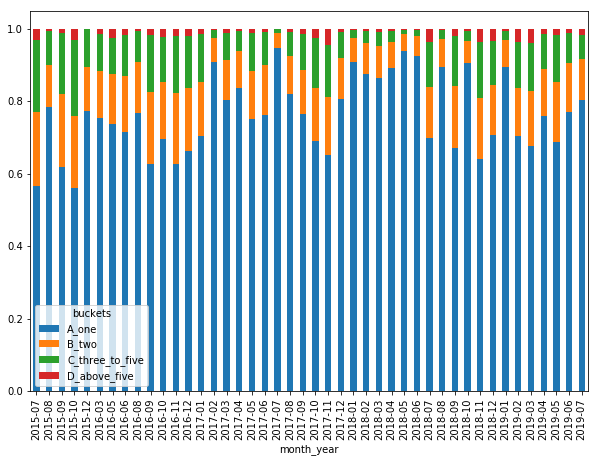

In [59]:
pivot_df = to_pivot_this.pivot(index='month_year', columns='buckets', values='share')
pivot_df.plot.bar(stacked=True, figsize=(10,7))

### Build Cohorts

In [60]:
def prepare_to_next(df):
    dist = df.groupby(['month_year','encrypted_customer_id'])['units'].sum().reset_index()
    dist['month_year_date'] = dist['month_year'].apply(lambda x : x.to_timestamp())
    return dist

In [77]:
d = prepare_to_next(pmd_subset)
d.head()

,month_year,encrypted_customer_id,units,month_year_date
0,2015-07,A02236791P5N69LIU16QL,1,2015-07-01
1,2015-07,A03304732F4510S0YHYII,2,2015-07-01
2,2015-07,A051108736H4WBGL5Y4D9,2,2015-07-01
3,2015-07,A05212551BQ1M7A7A53MA,1,2015-07-01
4,2015-07,A107639OB0Y8HQ,2,2015-07-01


In [83]:
pmd_subset.head()

,encrypted_customer_id,is_promo,is_pmd,fufill_date_local,revenue,units,min_date,max_date,first_pmd_date,first_ever_purchase_date,month_year,month_year_proper
0,A27RK0PZTWCCOU,promo,is_pmd,2019-04-30,3.32,1,2019-04-30,2019-04-30,2019-04-26,2019-04-13,2019-04,2019-04
2,A16JZ6X4GEGEK5,promo,is_pmd,2018-06-10,4.19,1,2018-06-10,2018-06-10,2015-09-25,2015-07-29,2018-06,2018-06
3,A3KD1FVDAXM3H1,promo,is_pmd,2018-07-11,5.03,1,2018-07-11,2018-07-11,2018-07-11,2018-03-02,2018-07,2018-07
7,A2IRBIHQ3KMBA6,promo,is_pmd,2019-02-01,3.32,4,2019-02-01,2019-02-01,2016-03-25,2015-05-30,2019-02,2019-02
15,A3F8M04ROZBOMA,promo,is_pmd,2019-04-13,1.66,1,2019-04-13,2019-04-13,2017-05-26,2016-01-15,2019-04,2019-04


#### Create a period column based on the OrderDate 

In [82]:
pmd_subset['month_year_proper'] = pmd_subset['fufill_date_local'].apply(lambda x: x.strftime("%Y-%m"))

C:\Users\dfadeeff\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Determine the user's cohort group (based on their first order)

In [88]:
pmd_subset.set_index('encrypted_customer_id', inplace=True)

pmd_subset['CohortGroup'] = pmd_subset.groupby(level=0)['fufill_date_local'].min().apply(lambda x: x.strftime('%Y-%m'))
pmd_subset.reset_index(inplace=True)
pmd_subset.head()

C:\Users\dfadeeff\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,encrypted_customer_id,is_promo,is_pmd,fufill_date_local,revenue,units,min_date,max_date,first_pmd_date,first_ever_purchase_date,month_year,month_year_proper,CohortGroup
0,A27RK0PZTWCCOU,promo,is_pmd,2019-04-30,3.32,1,2019-04-30,2019-04-30,2019-04-26,2019-04-13,2019-04,2019-04,2019-04
1,A16JZ6X4GEGEK5,promo,is_pmd,2018-06-10,4.19,1,2018-06-10,2018-06-10,2015-09-25,2015-07-29,2018-06,2018-06,2015-09
2,A3KD1FVDAXM3H1,promo,is_pmd,2018-07-11,5.03,1,2018-07-11,2018-07-11,2018-07-11,2018-03-02,2018-07,2018-07,2018-07
3,A2IRBIHQ3KMBA6,promo,is_pmd,2019-02-01,3.32,4,2019-02-01,2019-02-01,2016-03-25,2015-05-30,2019-02,2019-02,2016-03
4,A3F8M04ROZBOMA,promo,is_pmd,2019-04-13,1.66,1,2019-04-13,2019-04-13,2017-05-26,2016-01-15,2019-04,2019-04,2017-05


#### Rollup data by CohortGroup & OrderPeriod

In [89]:
grouped = pmd_subset.groupby(['CohortGroup', 'month_year_proper'])

# count the unique users, orders, and total revenue per Group + Period
cohorts = grouped.agg({'encrypted_customer_id': pd.Series.nunique,
                       'units': np.sum,
                       'revenue': np.sum})

# make the column names more meaningful
cohorts.rename(columns={'UserId': 'encrypted_customer_id',
                        'OrderId': 'units'}, inplace=True)
cohorts.head()

encrypted_customer_id  units  revenue
CohortGroup month_year_proper                                       
2015-07     2015-07                             2164   4130  3427.90
            2015-08                              258    451   374.33
            2015-09                              480   1223  1015.09
            2015-10                              272    660   547.80
            2015-12                              224    401   332.83

#### Label the CohortPeriod for each CohortGroup

In [94]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

encrypted_customer_id  units  revenue  \
CohortGroup month_year_proper                                          
2015-07     2015-07                             2164   4130  3427.90   
            2015-08                              258    451   374.33   
            2015-09                              480   1223  1015.09   
            2015-10                              272    660   547.80   
            2015-12                              224    401   332.83   

                               CohortPeriod  
CohortGroup month_year_proper                
2015-07     2015-07                       1  
            2015-08                       2  
            2015-09                       3  
            2015-10                       4  
            2015-12                       5

#### User Retention by Cohort Group

In [95]:
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['encrypted_customer_id'].groupby(level=0).first()
cohort_group_size.head()

CohortGroup
2015-07    2164
2015-08     405
2015-09     941
2015-10     414
2015-12     933
Name: encrypted_customer_id, dtype: int64

In [97]:
user_retention = cohorts['encrypted_customer_id'].unstack(0).divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2015-07,2015-08,2015-09,2015-10,2015-12,2016-03,2016-05,2016-06,2016-08,2016-09,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
CohortPeriod,,,,,,,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.119224,0.180247,0.139214,0.106280,0.037513,0.093863,0.151558,0.097705,0.220555,0.057900,...,0.329087,0.236553,0.078789,0.193642,0.244898,0.107819,0.218391,0.150754,0.110169,NaN
3,0.221811,0.093827,0.107333,0.091787,0.043944,0.104693,0.106232,0.226230,0.072768,0.218434,...,0.356688,0.062271,0.111207,0.300578,0.137755,0.114952,0.188834,0.079774,NaN,NaN
4,0.125693,0.103704,0.051010,0.086957,0.098607,0.088448,0.235127,0.068852,0.169542,0.137626,...,0.167728,0.106613,0.206741,0.176301,0.155977,0.096022,0.119869,NaN,NaN,NaN
5,0.103512,0.049383,0.086079,0.176329,0.081458,0.225632,0.075071,0.198033,0.144786,0.127165,...,0.182590,0.197031,0.123014,0.187861,0.132653,0.048285,NaN,NaN,NaN,NaN
6,0.062384,0.079012,0.157279,0.115942,0.206860,0.055957,0.198300,0.158033,0.130533,0.062410,...,0.309979,0.126084,0.127737,0.163295,0.062682,NaN,NaN,NaN,NaN,NaN
7,0.075323,0.128395,0.114772,0.299517,0.061093,0.194946,0.169972,0.139672,0.078770,0.176407,...,0.182590,0.134953,0.117647,0.148844,NaN,NaN,NaN,NaN,NaN,NaN
8,0.145564,0.118519,0.294368,0.123188,0.175777,0.180505,0.167139,0.080000,0.202551,0.167929,...,0.218684,0.108348,0.052812,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.114603,0.279012,0.088204,0.248792,0.146838,0.140794,0.090652,0.214426,0.192048,0.143579,...,0.222930,0.045498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


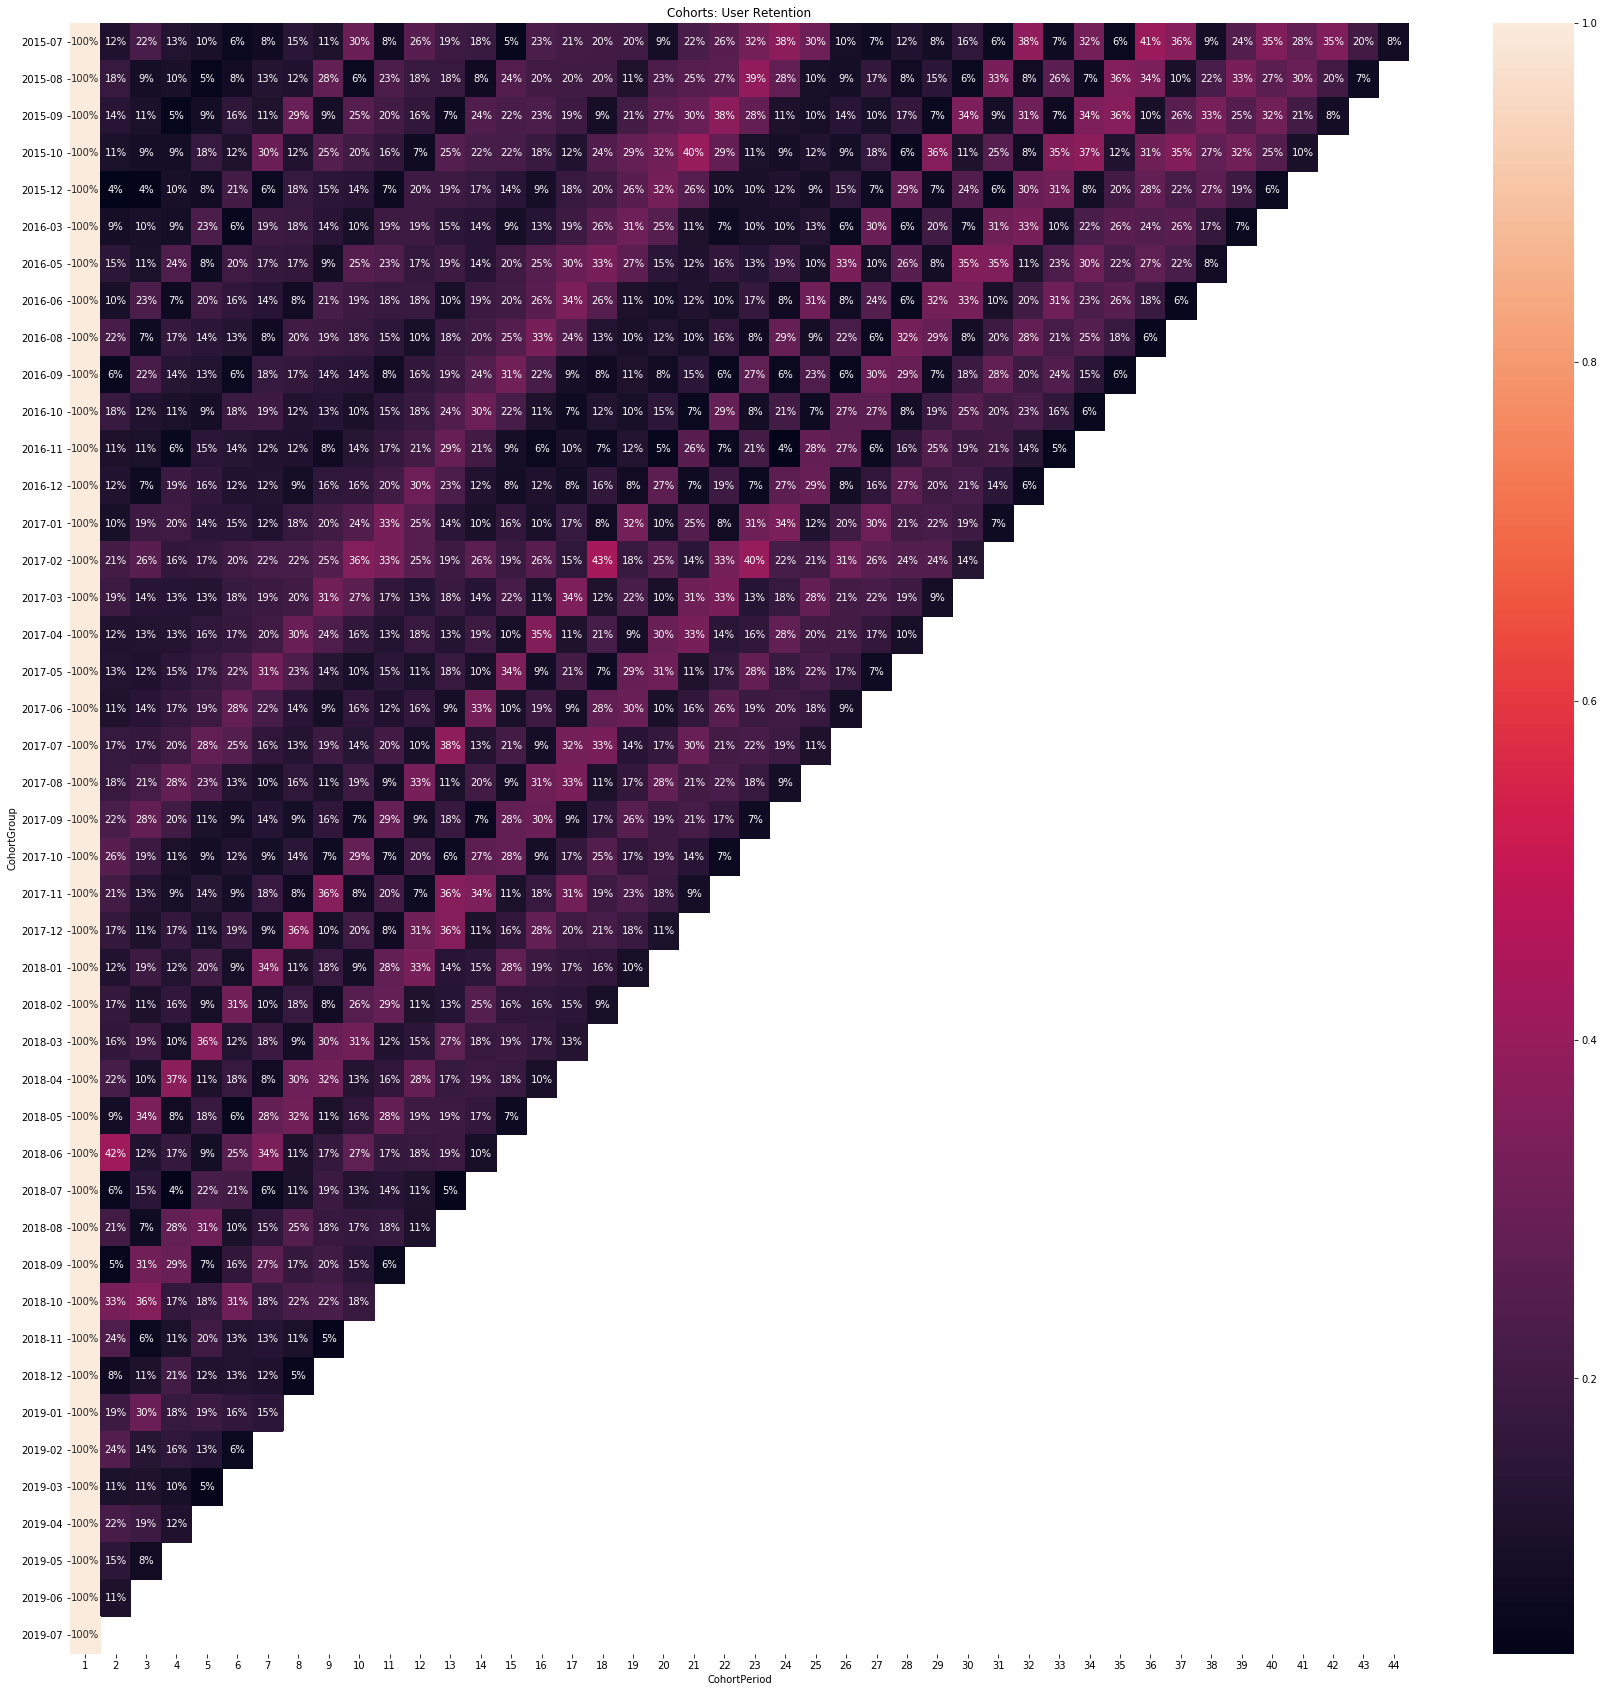

In [107]:
plt.figure(figsize=(30, 30))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

In [111]:
pmd_subset[pmd_subset['CohortGroup'] == '2019-05'].head()
#pmd_subset[pmd_subset['encrypted_customer_id'] == 'A2F7A8MR5Y9ZYL'].sort_values(by = 'fufill_date_local', ascending = True)

,encrypted_customer_id,is_promo,is_pmd,fufill_date_local,revenue,units,min_date,max_date,first_pmd_date,first_ever_purchase_date,month_year,month_year_proper,CohortGroup
38,A1AUZ2LDHSVBEV,promo,is_pmd,2019-05-16,5.03,1,2019-05-16,2019-05-16,2019-05-16,2019-02-08,2019-05,2019-05,2019-05
248,A2F7A8MR5Y9ZYL,promo,is_pmd,2019-05-03,0.83,1,2019-05-03,2019-05-03,2019-05-03,2016-08-29,2019-05,2019-05,2019-05
463,A1L2YKWKGP761W,promo,is_pmd,2019-05-05,0.82,1,2019-05-05,2019-05-05,2019-05-05,2019-05-05,2019-05,2019-05,2019-05
486,A2OQ6ZR7S8ALIY,promo,is_pmd,2019-05-31,1.66,2,2019-05-31,2019-05-31,2019-05-31,2019-05-31,2019-05,2019-05,2019-05
1711,A2AIU30Q4L3TU4,promo,is_pmd,2019-05-31,0.83,1,2019-05-31,2019-05-31,2019-05-31,2016-01-09,2019-05,2019-05,2019-05


In [113]:
pmd_subset[pmd_subset['CohortGroup'] == '2019-05']['encrypted_customer_id'].nunique()

1592

In [120]:
pmd_subset[(pmd_subset['month_year_proper'] == '2019-06') &
(pmd_subset['encrypted_customer_id'].isin(pmd_subset[pmd_subset['CohortGroup'] == '2019-05']['encrypted_customer_id']))]['encrypted_customer_id'].


5832      A3EBJHYZAWEVXK
6450       A9EG9TDT9EN8G
8756      A3UT5Q2124LRKT
9439      A2D0QCBWSQ3ND6
11551      A9EG9TDT9EN8G
15983      APK7DZBSS3312
17358     A2JZUH9SV6J3PC
18923     A12HFEIKEGGSJY
19116      AH19TNR2OQUBU
20909      AH4QZ74HT6ONC
21327     A191F87PITR21F
23488      ATQBEYLLWJNTA
25492      AAX4NWGR0VQNB
27431     A1LZYC02C9N3O4
28140     A1WJAHN1VVCSRB
28246     A22N68MJD8ZY9W
30337     A24J7LG7JOZRJ4
35749     A1G5YFD2FDJPSK
38667     A2FV2S8U1IG01Q
39068     A1V9YGW707Y1DN
39203     A18NC5FM1AD6VM
39260      AL2LI49XSOWUB
39750      AJWHTEQJJFCLM
45342     A2JZUH9SV6J3PC
53858     A2JZUH9SV6J3PC
53966     A24R98DGV2U5UO
55971     A2Q15LPZ5H89WO
56506     A37IM2IQIPQ6PM
63849     A1HUZL0D432XQN
64049      AWZ5ABJ20TYA1
               ...      
487833     ASXK9SFD3YOA2
488007     ASGYHV76NB1NG
488454    A3GFLQSVQVJDQN
490792    A2UCNYIVSH2VAC
492797    A27ZY129ZMJ656
492862    A3O4699ZNTMSNW
497529     APCGV6CU1NIEK
498660    A3SRUVP9PY6DIR
501635    A3N85YZ2EYUU8Z
